In [31]:
import numpy as np
import bilby
from pycbc.detector import Detector
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from multiprocessing import Pool
from tqdm import tqdm
import warnings
import json
import imp
import pylab as plt

In [32]:
import quintet
imp.reload(quintet)

<module 'quintet' from '/Users/hemantaph/phd/quintet/quintet/__init__.py'>

In [33]:
quin_ = quintet.Quintet(npool=int(6), nsamples_mtot=200, nsamples_mass_ratio=500, waveform_approximant = "IMRPhenomD", \
                        snr_type='interpolation', waveform_inspiral_must_be_above_fmin=False)

Given: IMR waveform
psds not given. Choosing bilby's default psds
getting stored interpolator...
In case if you need regeneration of interpolator of the given gwsnr param, please delete this file, ./interpolator_pickle/halfSNR_dict_3.pickle


In [34]:
nsamples = 1000
total_mass = np.sort(np.random.uniform(quin_.mtot_min,quin_.mtot_max, nsamples)) #np.linspace(2.,439.6,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
#mass_ratio = 0.15*np.ones(nsamples)
mass_1 = total_mass/(1+mass_ratio)
mass_2 = mass_1*mass_ratio
#total_mass = mass_1+mass_2
mass_ratio = mass_2/mass_1
# Fix luminosity distance
luminosity_distance = 100
# Randomly sample everything else:
theta_jn =  0.
ra, dec, psi, phase = 0., 0., 0., 0.
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin

GPStimeValue = 1246527224.169434*np.ones(nsamples)

In [35]:
nsamples = 1000
chirp_mass = np.linspace(10,100,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
total_mass = mass_1+mass_2
mass_ratio = mass_2/mass_1
# Fix luminosity distance
luminosity_distance = 200*np.ones(nsamples)
# Randomly sample everything else:
theta_jn = np.random.uniform(0,2*np.pi, size=nsamples)
ra, dec, psi, phase = np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,np.pi, size=nsamples),\
                        np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,2*np.pi, size=nsamples)
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin
GPStimeValue = 1246527224.169434*np.ones(nsamples)

In [36]:
snrs2 = quin_.snr(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                iota=theta_jn, psi=psi, ra=ra, dec=dec,)

In [37]:
snrs1 = quin_.compute_bilby_snr_(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                theta_jn=theta_jn, psi=psi, ra=ra, dec=dec,)

100%|███████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.18it/s]


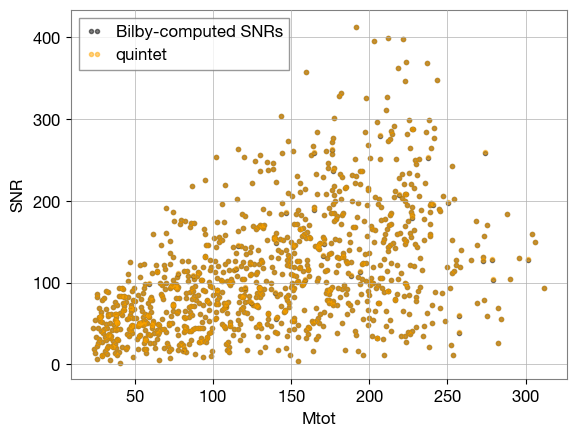

In [42]:
plt.plot(total_mass,snrs1['L1'], '.', color='black', alpha=0.5, label='Bilby-computed SNRs')
plt.plot(total_mass,snrs2['L1'], '.', color='orange', alpha=0.5, label='quintet')
plt.ylabel('SNR')
#plt.xlabel('bilby_SNR')
plt.xlabel('Mtot')
plt.legend()
plt.show()

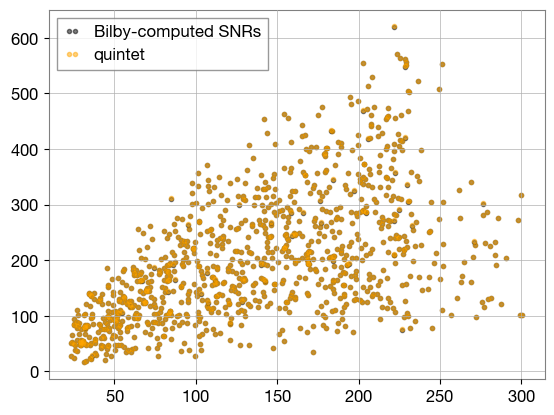

In [28]:
plt.plot(total_mass,snrs1['opt_snr_net'], '.', color='black', alpha=0.5, label='Bilby-computed SNRs')
plt.plot(total_mass,snrs2['opt_snr_net'], '.', color='orange', alpha=0.5, label='quintet')
plt.legend()
plt.show()

In [16]:
np.searchsorted(quin_.ratio, 0.2)

60

In [28]:
idx = abs(snrs2['L1']-snrs1['L1'])>3

In [29]:
mass_ratio[idx]

array([0.37003199, 0.54160647, 0.44022193, 0.34924261,
       0.52327136, 0.36158973])

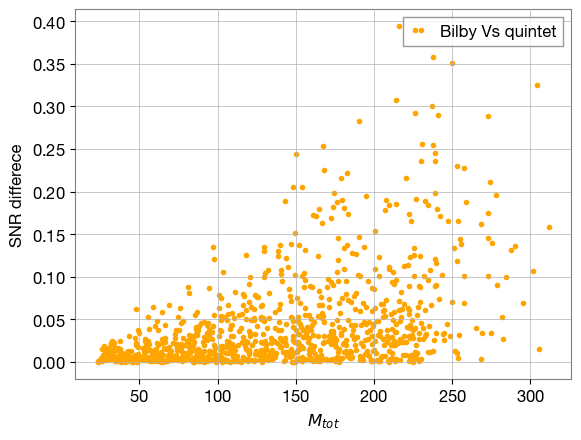

In [47]:
plt.plot(total_mass,abs(snrs2['L1']-snrs1['L1']), '.', color='orange', label='Bilby Vs quintet')
plt.ylabel('SNR differece')
plt.xlabel(r'$M_{tot}$')
plt.legend()
plt.show()

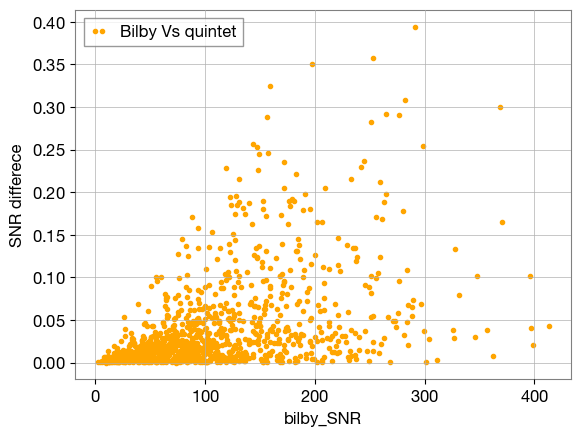

In [48]:
# n=50
# geomspace opposite
plt.plot(snrs1['L1'],abs(snrs2['L1']-snrs1['L1']), '.', color='orange', label='Bilby Vs quintet')
plt.ylabel('SNR differece')
plt.xlabel('bilby_SNR')
plt.legend()
plt.show()

In [11]:
quin_ = quintet.Quintet(npool=int(6), nsamples_mtot=100, nsamples_mass_ratio=500, waveform_approximant = "IMRPhenomD", \
                        snr_type='interpolation', waveform_inspiral_must_be_above_fmin=False)

Given: IMR waveform
psds not given. Choosing bilby's default psds
getting stored interpolator...
In case if you need regeneration of interpolator of the given gwsnr param, please delete this file, ./interpolator_pickle/halfSNR_dict_1.pickle


In [16]:
snrs2 = quin_.snr(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                iota=theta_jn, psi=psi, ra=ra, dec=dec,)

In [17]:
snrs1 = quin_.compute_bilby_snr_(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                theta_jn=theta_jn, psi=psi, ra=ra, dec=dec,)

100%|███████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.83it/s]


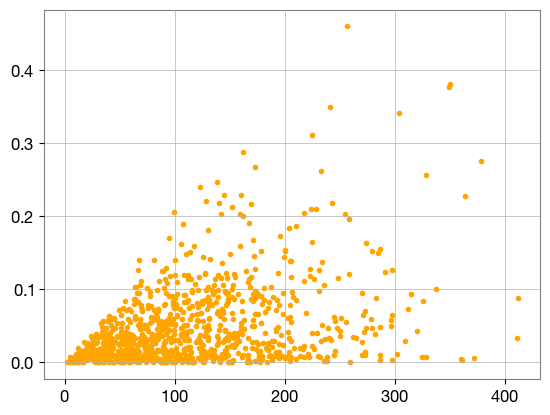

In [18]:
# n=50
# geomspace opposite
plt.plot(snrs1['L1'],abs(snrs2['L1']-snrs1['L1']), '.', color='orange', label='Bilby Vs quintet')
#plt.xlim(2,20)
#plt.ylim(0,10)
plt.show()

In [95]:
test_ = interp1d( total_mass, abs(snrs2['L1']-snrs1['L1']), kind = 'cubic')

In [101]:
nsamples = 100
total_mass = np.random.uniform(10.,400.6,nsamples)
#mass_ratio = np.random.uniform(0.2,1,size=nsamples)
mass_ratio = 0.2*np.ones(nsamples)
mass_1 = total_mass/(1+mass_ratio)
mass_2 = mass_1*mass_ratio
#total_mass = mass_1+mass_2
mass_ratio = mass_2/mass_1
# Fix luminosity distance
luminosity_distance = 200*np.ones(nsamples)
# Randomly sample everything else:
theta_jn =  0.*np.ones(nsamples)
ra, dec, psi, phase = 0.*np.ones(nsamples), 0.*np.ones(nsamples), 0.*np.ones(nsamples), 0.*np.ones(nsamples)
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin

GPStimeValue = 1246527224.169434*np.ones(nsamples)

In [102]:
snrs1 = quin_.compute_bilby_snr_(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                theta_jn=theta_jn, psi=psi, ra=ra, dec=dec,)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.14it/s]


In [103]:
snrs2 = quin_.snr(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                iota=theta_jn, psi=psi, ra=ra, dec=dec,)

In [104]:
correction = test_(total_mass)

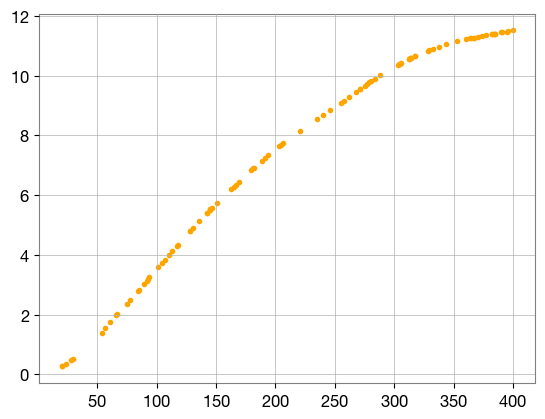

In [105]:
# n=50
# geomspace opposite
plt.plot(total_mass,correction, '.', color='orange', label='Bilby Vs quintet')
#plt.xlim(2,20)
#plt.ylim(0,10)
plt.show()

In [60]:
snrs1.keys

dict_keys(['L1', 'H1', 'V1', 'opt_snr_net'])

In [61]:
quin_.list_of_detectors

['L1', 'H1', 'V1']

In [215]:
mtot_min = quin_.mtot_min
mtot_max = quin_.mtot_max
nsamples = quin_.nsamples
detectors = quin_.list_of_detectors
f_min = quin_.f_min

# geocent_time cannot be array here
# this geocent_time is only to get halfScaledSNR
geocent_time_ = 1246527224.169434 # random time from O3

iota_, ra_, dec_, psi_, phase_ = 0.,0.,0.,0.,0.
luminosity_distance_ = 100.

ratio = quin_.ratio
correction_ = np.zeros((len(ratio),len(detectors)),dtype=object)
i = 0

q = 0.2
mass_ratio = q
if quin_.waveform_inspiral_must_be_above_fmin==True:
    func = lambda x: quin_.findchirp_chirptime(x/(1+mass_ratio),x/(1+mass_ratio)*mass_ratio, f_min)
    mtot_max = fsolve(func, 150)[0] # to make sure that chirptime is not negative, TaylorF2 might need this

mtot_table = np.sort(np.random.uniform(mtot_min,  mtot_max, nsamples-2)).tolist()
mtot_table = np.array([mtot_min]+mtot_table+[mtot_max])
mass_1_ = np.round(mtot_table/(1+q),5)
mass_1_[0] = mass_1_[0]+0.00001
mass_1_[-1] = mass_1_[-1]-0.00001
mass_2_ = np.round(mass_1_*q,5)


In [216]:
mtot_table

array([  2.        ,   2.64824699,   6.91337761,   9.08472906,
        15.54070072,  15.78726473,  21.73175807,  21.8739701 ,
        24.79206667,  25.86952401,  27.2351757 ,  27.83467959,
        32.46302529,  34.66792692,  42.31779955,  54.33679044,
        56.97274393,  60.926887  ,  66.47365498,  66.69437605,
        69.52649152,  76.28764912,  80.78414096,  81.92206948,
        90.23805728,  98.52012197, 103.9428264 , 104.41364339,
       107.22972381, 108.57536751, 110.87993298, 112.38866045,
       112.85732775, 114.134598  , 114.34230219, 116.27839312,
       120.21719105, 121.99601055, 126.70091407, 129.60047745,
       129.81320089, 158.29801388, 160.83061417, 162.2141672 ,
       164.67212516, 176.28815294, 183.72077653, 185.04484353,
       191.65276231, 191.8738881 , 193.74235126, 195.26863779,
       196.5952441 , 198.45639147, 207.19435422, 217.00541693,
       217.97682732, 221.57291811, 222.35644425, 230.60601879,
       240.41705397, 240.63514389, 241.37408129, 247.09

In [217]:
######## calling bilby_snr ########
bilby_snr = quin_.compute_bilby_snr_(mass_1=mass_1_, mass_2=mass_2_, luminosity_distance=luminosity_distance_, \
                                        theta_jn=iota_, psi=psi_, ra=ra_, dec=dec_,verbose=False, jsonFile=False)  

In [218]:
interpolation_snr = quin_.snr_with_interpolation(mass_1=mass_1_, mass_2=mass_2_, luminosity_distance=luminosity_distance_, \
                                    iota=iota_, psi=psi_, ra=ra_, dec=dec_, jsonFile=False)

In [219]:
correction_ = np.zeros(len(detectors),dtype=object)
######## filling in interpolation table for different detectors ########
j = 0
for det in detectors:
    correction_[j] = interp1d( mtot_table, abs(interpolation_snr[det]-bilby_snr[det]), kind = 'cubic')
    j+=1

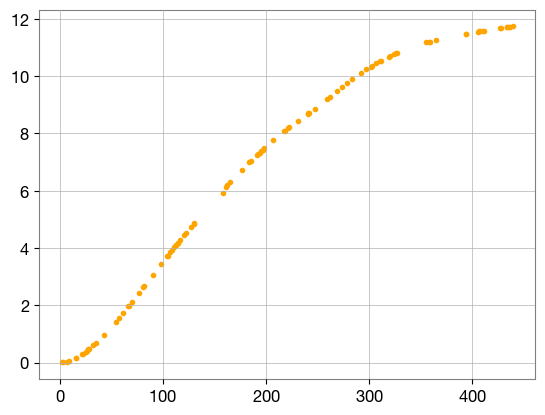

In [220]:
# n=50
# geomspace opposite
plt.plot(mtot_table,correction_[0](mtot_table), '.', color='orange', label='Bilby Vs quintet')
#plt.xlim(2,20)
#plt.ylim(0,10)
plt.show()

In [241]:
quin_.ratio

array([0.1       , 0.11836735, 0.13673469, 0.15510204,
       0.17346939, 0.19183673, 0.21020408, 0.22857143,
       0.24693878, 0.26530612, 0.28367347, 0.30204082,
       0.32040816, 0.33877551, 0.35714286, 0.3755102 ,
       0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898,
       0.54081633, 0.55918367, 0.57755102, 0.59591837,
       0.61428571, 0.63265306, 0.65102041, 0.66938776,
       0.6877551 , 0.70612245, 0.7244898 , 0.74285714,
       0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592,
       0.90816327, 0.92653061, 0.94489796, 0.96326531,
       0.98163265, 1.        ])

In [341]:
quin_.nsamples

100

In [32]:
# L1
def __init_halfScaled():
    '''
    '''
    mtot_min = quin_.mtot_min
    mtot_max = quin_.mtot_max
    nsamples = quin_.nsamples
    detectors = quin_.list_of_detectors

    try:
        if  mtot_min<1.:
            raise ValueError
    except ValueError:
        print('Error: mass too low')

    C = 299792458.
    G = 6.67408*1e-11
    Mo = 1.989*1e30
    f_min = quin_.f_min

    # geocent_time cannot be array here
    # this geocent_time is only to get halfScaledSNR
    geocent_time_ = 1246527224.169434 # random time from O3

    iota_, ra_, dec_, psi_, phase_ = 0.,0.,0.,0.,0.
    luminosity_distance_ = 100.
    
    quin_.ratio = np.linspace(0.1,1,100)
    mtot_table = np.linspace(mtot_min,  mtot_max, 100)
    ratio = quin_.ratio
    snrHalf_ = np.zeros((len(ratio),len(detectors)),dtype=object)
    i = 0
    snrHalf_ = []
    for q in tqdm(ratio, desc="interpolation for each mass_ratios", total=len(ratio), ncols= 100):

        mass_ratio = q
        if quin_.waveform_inspiral_must_be_above_fmin==True:
            func = lambda x: quin_.findchirp_chirptime(x/(1+mass_ratio),x/(1+mass_ratio)*mass_ratio, f_min)
            mtot_max = fsolve(func, 150)[0] # to make sure that chirptime is not negative, TaylorF2 might need this

        mass_1_ = mtot_table/(1+q)
        mass_2_ = mass_1_*q
        mchirp = ( (mass_1_*mass_2_)**(3/5) )/( (mtot_table)**(1/5) )
        ######## calling bilby_snr ########
        opt_snr_unscaled = quin_.compute_bilby_snr_(mass_1=mass_1_, mass_2=mass_2_, luminosity_distance=luminosity_distance_, \
                                                theta_jn=iota_, psi=psi_, ra=ra_, dec=dec_,verbose=False, jsonFile=False)  

        A2 = mchirp**(5./6.)
        ######## filling in interpolation table for different detectors ########
        # L1
        Fp, Fc = Detector('L1').antenna_pattern(ra_, dec_, psi_, geocent_time_)
        Deff2 = luminosity_distance_/np.sqrt(Fp**2*((1+np.cos(iota_)**2)/2)**2+Fc**2*np.cos(iota_)**2 )
        snrHalf_.append(((Deff2/A2)*opt_snr_unscaled['L1']).tolist())
        i+=1
        
    return(np.array(snrHalf_))

In [33]:
snrHalf_ = __init_halfScaled()

interpolation for each mass_ratios: 100%|█████████████████████████| 100/100 [02:01<00:00,  1.21s/it]


In [34]:
np.shape(snrHalf_)

(100, 100)

In [37]:
import numpy as np
from scipy import interpolate

mymin,mymax = 0,1
X = np.linspace(quin_.mtot_min,  quin_.mtot_max, 100)
Y = np.linspace(0.1,1,100)

x,y = np.meshgrid(X,Y)

test = snrHalf_

f = interpolate.interp2d(x,y,test,kind='cubic')


In [41]:
np.geomspace(0.1,1,50)[20]

0.2559547922699536

In [40]:
quin_.halfSNR[20,0](100)

array(1844.3446451)

In [42]:
f(100,0.2559547922699536)

array([1844.34194039])

In [46]:
def snr_with_interpolation(mass_1, mass_2, luminosity_distance=100., iota=0., \
            psi=0., phase=0., geocent_time=1246527224.169434, ra=0., dec=0., jsonFile=False):
        
        mass_1, mass_2 = np.array([mass_1]).reshape(-1), np.array([mass_2]).reshape(-1)
        size = len(mass_1)
        luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec = \
                                        np.array([luminosity_distance]).reshape(-1)*np.ones(size), \
                                        np.array([iota]).reshape(-1)*np.ones(size), \
                                        np.array([psi]).reshape(-1)*np.ones(size), \
                                        np.array([phase]).reshape(-1)*np.ones(size), \
                                        np.array([geocent_time]).reshape(-1)*np.ones(size), \
                                        np.array([ra]).reshape(-1)*np.ones(size), \
                                        np.array([dec]).reshape(-1)*np.ones(size)
        
        Mc = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
        mtot = mass_1+mass_2
        luminosity_distance = luminosity_distance
        
        '''
        # dealing with mtot array
        # mtot > mtot_max will be have snr = 0.
        snr_half_scaled = np.zeros(size) # for mtot > mtot_max, set zero value will not change later
        idx2 = np.array(np.where(quin_.mtot_max>=mtot)).reshape(-1).tolist() # record index with mtot values less than mtot_max
        # getting simple snr_half_scaled values for interpolation
        halfSNR_interpolator = quin_.halfSNR
        '''
        snr_half_scaled = np.zeros(size)
        approx_duration = quin_.findchirp_chirptime(mass_1, mass_2, quin_.f_min)
        # select only those that have inspiral part above f_min
        if quin_.waveform_inspiral_must_be_above_fmin==True:
            idx2 = approx_duration>0.
        else:
            idx2 = np.full(size,True)
        
        # getting simple snr_half_scaled values for interpolation
        halfSNR_interpolator = f
        
        A1 = Mc**(5./6.)
        ci_2 = np.cos(iota)**2
        ci_param = ((1+np.cos(iota)**2)/2)**2
        detectors = quin_.list_of_detectors
        
        #opt_snr = {'opt_snr_net': 0}

        idx_ratio = np.searchsorted(quin_.ratio, mass_2/mass_1)
        idx_tracker = np.arange(size)
        idx_tracker = idx_tracker[idx2]
        #quin_.idx_ratio = idx_ratio 
        # loop wrt detectors
        i = 0
        det = 'L1'
        # calculation of snr_half_scaled for particular detector at the required mtot
        for j in idx_tracker:
            snr_half_scaled[j] = halfSNR_interpolator(mtot[j],idx_ratio[j]) # i is iterator wrt detectors

        Fp, Fc = Detector(det).antenna_pattern(ra, dec, psi, geocent_time)
        Deff1 = luminosity_distance/np.sqrt( Fp**2*ci_param + Fc**2*ci_2 )

        opt_snr = (A1/Deff1)*snr_half_scaled
        #opt_snr['opt_snr_net'] += opt_snr[det]**2

        #opt_snr['opt_snr_net'] = np.sqrt(opt_snr['opt_snr_net'])
        #quin_.stored_snrs = opt_snr # this stored snrs can be use for Pdet calculation
        
        # how to load data form .json file
        # f = open ('data.json', "r")
        # data = json.loads(f.read())
        
        return( opt_snr )

In [47]:
nsamples = 1000
total_mass = np.sort(np.random.uniform(quin_.mtot_min,quin_.mtot_max, nsamples)) #np.linspace(2.,439.6,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
#mass_ratio = 0.15*np.ones(nsamples)
mass_1 = total_mass/(1+mass_ratio)
mass_2 = mass_1*mass_ratio
#total_mass = mass_1+mass_2
mass_ratio = mass_2/mass_1
# Fix luminosity distance
luminosity_distance = 100
# Randomly sample everything else:
theta_jn =  0.
ra, dec, psi, phase = 0., 0., 0., 0.
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin

GPStimeValue = 1246527224.169434*np.ones(nsamples)

In [56]:
snrs3 = snr_with_interpolation(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                iota=theta_jn, psi=psi, ra=ra, dec=dec,)

In [60]:
quin_.ratio = np.geomspace(0.1,1,50)

In [62]:
snrs2 = quin_.snr(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                iota=theta_jn, psi=psi, ra=ra, dec=dec,)

In [49]:
snrs1 = quin_.compute_bilby_snr_(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, \
                                                theta_jn=theta_jn, psi=psi, ra=ra, dec=dec,)

100%|██████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.38it/s]


In [52]:
snrs2

array([ 29.41028589,  29.59823227,  34.59016546, ...,
       932.19783569, 918.11442411, 921.86946054])

In [54]:
snrs1['L1']

array([ 29.12797087,  29.16261513,  34.17358658, ...,
       910.76796624, 864.46990683, 876.73693593])

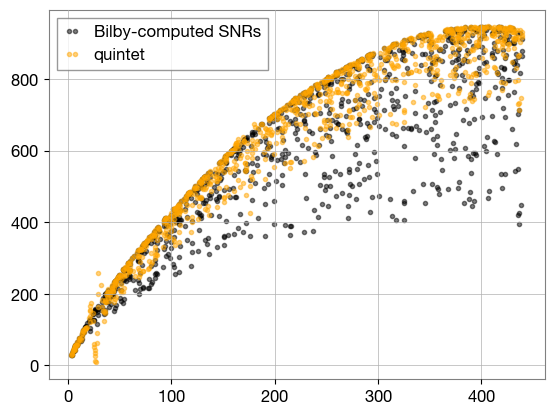

In [63]:
plt.plot(total_mass,snrs1['L1'], '.', color='black', alpha=0.5, label='Bilby-computed SNRs')
plt.plot(total_mass,snrs3, '.', color='orange', alpha=0.5, label='quintet')
plt.legend()
plt.show()

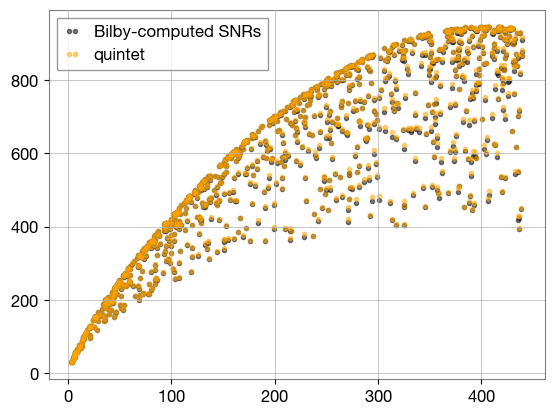

In [64]:
plt.plot(total_mass,snrs1['L1'], '.', color='black', alpha=0.5, label='Bilby-computed SNRs')
plt.plot(total_mass,snrs2['L1'], '.', color='orange', alpha=0.5, label='quintet')
plt.legend()
plt.show()